### 一、实验目的

培养学生具备一定的数学建模、数据分析与处理的能力，掌握典型的数据分类建模方法，巩固加深学生对k近邻、决策树、朴素贝叶斯和SVM（支持向量机）算法基本操作的理解与掌握。培养学生灵活运用k近邻、决策树、朴素贝叶斯和SVM（支持向量机）理论处理实际分类问题的能力。锻炼学生从抽象思维到具体实现之间进行转换的能力，提高学生上机实践操作能力。

### 二、实验内容

1. 多种方法解决iris数据集识别
    1. 构建SVM程序，实现对iris数据集的分类。
    2. 要求分别使用线性SVM和核化SVM方法实现，并对比分析两种方法的区别。
    3. 使用k近邻、决策树、朴素贝叶斯实现分类。

2. 任选一种方法实现pima-indians-diabetes（pima印第安纳糖尿病）数据集识别。

3. 多种方法解决手写数字识别（选做）。

### 三、实验步骤

#### 1. 阐述每种方法的基本原理

**k近邻（K-Nearest Neighbors, KNN）：**
KNN是一种基于实例的学习方法，属于惰性学习。其基本思想是，对于一个未知样本，根据训练集中与该样本最近的k个样本的类别，通过多数表决等方式决定该样本的类别。

**决策树（Decision Tree）：**
决策树是一种树状结构，其中每个内部节点表示一个属性测试，每个分支表示一个测试结果，每个叶节点表示一个类标签。其构建过程是递归地选择最优属性将数据集划分为子集，直到满足停止条件为止。

**朴素贝叶斯（Naive Bayes）：**
朴素贝叶斯是一类简单但强大的分类算法，基于贝叶斯定理与特征之间条件独立的假设。其基本思想是通过训练数据计算先验概率和条件概率，然后根据贝叶斯定理进行分类预测。

**支持向量机（Support Vector Machine, SVM）：**
SVM是一种用于二分类任务的监督学习模型，通过构造一个最大间隔的超平面将样本进行分隔。对于非线性可分的数据，可以通过核方法将数据映射到高维空间，使其线性可分。

#### 2. 用Python完成实验内容1的算法设计和程序设计并上机调试通过

##### 2.1 程序代码（以SVM为例）：


Training prediction: 0.943
Test data prediction: 0.978
Training data Accuracy: 0.943
Testing data Accuracy: 0.978


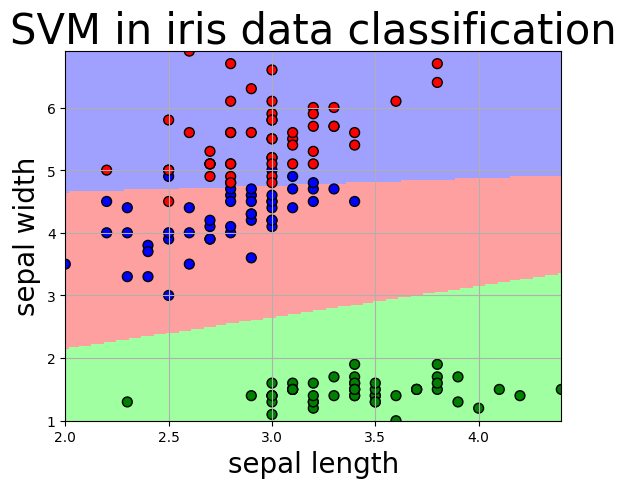

Training prediction: 0.943
Test data prediction: 0.978
Training data Accuracy: 0.943
Testing data Accuracy: 0.978


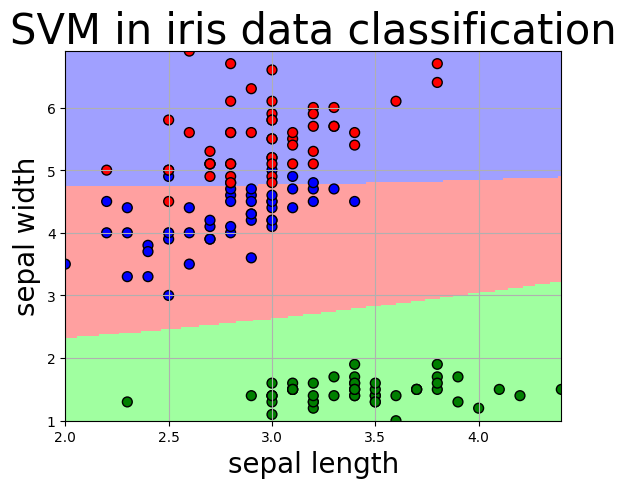

In [9]:
import numpy as np
from sklearn import svm, model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl

# 将字符串转为整型，便于数据加载
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

# 加载数据
data_path = '../data/iris.data'
data = np.loadtxt(data_path, dtype=float, delimiter=',', converters={4: iris_type})

# 数据分割
x, y = np.split(data, (4,), axis=1)
x = x[:, 1:3]  # 选择两列特征用于可视化
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1, test_size=0.3)

# 定义SVM模型（线性核和RBF核）
def classifier(kernel='linear'):
    return svm.SVC(C=0.5, kernel=kernel, decision_function_shape='ovr')

# 训练模型
def train(clf, x_train, y_train):
    clf.fit(x_train, y_train.ravel())

# 模型评估
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy: %.3f' % (tip, np.mean(acc)))

def print_accuracy(clf, x_train, y_train, x_test, y_test):
    print('Training prediction: %.3f' % (clf.score(x_train, y_train)))
    print('Test data prediction: %.3f' % (clf.score(x_test, y_test)))
    show_accuracy(clf.predict(x_train), y_train, 'Training data')
    show_accuracy(clf.predict(x_test), y_test, 'Testing data')

# 可视化结果
def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    grid_hat = clf.predict(grid_test).reshape(x1.shape)
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b', 'r'])
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark)
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

# 创建和训练线性核SVM
clf_linear = classifier(kernel='linear')
train(clf_linear, x_train, y_train)
print_accuracy(clf_linear, x_train, y_train, x_test, y_test)
draw(clf_linear, x)

# 创建和训练RBF核SVM
clf_rbf = classifier(kernel='rbf')
train(clf_rbf, x_train, y_train)
print_accuracy(clf_rbf, x_train, y_train, x_test, y_test)
draw(clf_rbf, x)


##### 2.2 程序运行截图：

（截图应包括控制台输出的准确率以及可视化的分类结果图）

#### 3. 用Python完成实验内容2的算法设计和程序设计并上机调试通过

##### 3.1 程序代码：

（以下以朴素贝叶斯为例）

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加载数据
data_path = '../data/pima-indians-diabetes.data'
data = np.loadtxt(data_path, delimiter=',')
x, y = data[:, :-1], data[:, -1]

# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 训练模型
clf = GaussianNB()
clf.fit(x_train, y_train)

# 预测和评估
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Training Accuracy: %.3f" % accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: %.3f" % accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.762
Testing Accuracy: 0.784


## 3.2 程序运行截图：

（截图应包括控制台输出的准确率）

### 四、实验体会

通过本次实验，我深入了解了k近邻、决策树、朴素贝叶斯和SVM等分类算法的基本原理和应用方法。通过对iris数据集和pima-indians-diabetes数据集的实验，我掌握了如何使用Python进行数据加载、预处理、模型训练和评估，并通过可视化方法展示分类结果。此外，实验提高了我解决实际分类问题的能力，增强了从理论到实际操作的转换能力。总的来说，本次实验对我在机器学习领域的学习和实践具有重要的指导意义。